Here we do bla bla

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
with open(r"./data/spotify_songs.csv", 'r', encoding="utf8") as f:
    df = pd.read_csv(f)

Attribute 1 primarily represented by PC1: loudness
Attribute 1 primarily represented by PC2: valence
Attribute 2 primarily represented by PC1: energy
Attribute 2 primarily represented by PC2: instrumentalness
Attribute 3 primarily represented by PC1: acousticness
Attribute 3 primarily represented by PC2: danceability


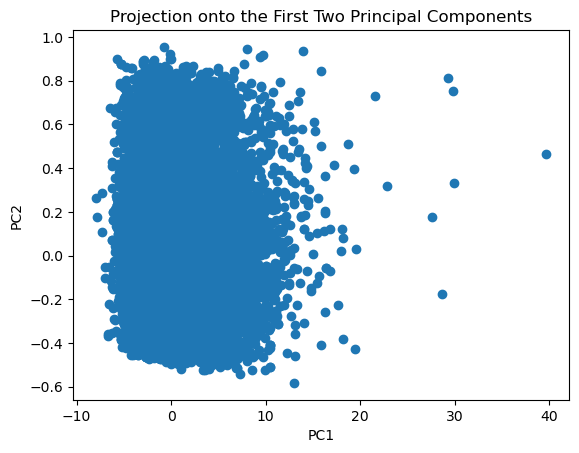

In [3]:
selected_attributes = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence']

dataframe = df[selected_attributes]
dataframe = dataframe.dropna()

# Standardize the data
mu = np.mean(dataframe, axis=0)
X = dataframe - mu

# Perform PCA
U, S, VT = np.linalg.svd(X)
V = np.transpose(VT)
Z = np.dot(X, V)

PC1 = V[:, 0]
PC2 = V[:, 1]

#Find the attributes that are primarily represented by the first and second PC
attributes_for_PC1 = dataframe.columns[np.argsort(np.abs(PC1))[::-1]]
attributes_for_PC2 = dataframe.columns[np.argsort(np.abs(PC2))[::-1]]
print("Attribute 1 primarily represented by PC1: " + attributes_for_PC1[0])
print("Attribute 1 primarily represented by PC2: " + attributes_for_PC2[0])
print("Attribute 2 primarily represented by PC1: " + attributes_for_PC1[1])
print("Attribute 2 primarily represented by PC2: " + attributes_for_PC2[1])
print("Attribute 3 primarily represented by PC1: " + attributes_for_PC1[2])
print("Attribute 3 primarily represented by PC2: " + attributes_for_PC2[2])

scatter_pc1_pc2 = plt.figure()
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection onto the First Two Principal Components')
plt.show()

In [4]:
split_percentage = 0.7
split_index = int(len(df) * split_percentage)

df_train = df.iloc[:split_index]

dtc_attr = ['danceability','energy','loudness','speechiness','liveness','valence']
X_dtc_attr = df_train[dtc_attr]
y_dtc_attr = df_train['mode'].ravel()

feature_names_list = X_dtc_attr.columns.tolist()

dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=450)
dtc.fit(X_dtc_attr, y_dtc_attr)

# Assuming you have a testing set df_test
df_test = df.iloc[split_index:]

X_test = df_test[dtc_attr]
y_test = df_test['mode'].ravel()

# Use the trained decision tree model to predict on the test set
y_pred = dtc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy*100}")

Decision Tree Accuracy: 52.80203045685279


In [7]:
isof_attr = ['danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence']
X_isof_attr = df_train[isof_attr]
y_isof_attr = df_train['mode'].ravel()

feature_names_list = X_isof_attr.columns.tolist()

# Create and fit the Isolation Forest model
isof = IsolationForest(contamination=0.05)  # You can adjust the contamination parameter as needed
isof.fit(X_isof_attr)

# Assuming you have a testing set df_test
df_test = df.iloc[split_index:]

X_test = df_test[isof_attr]
y_test = df_test['mode'].ravel()

# Use the trained Isolation Forest model to predict on the test set
y_pred = isof.predict(X_test)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Isolation Forest Accuracy: {accuracy * 100}")

Isolation Forest Accuracy: 51.39086294416244


C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\amand\anaconda3\Lib\site-packages\sklearn\base.py:4


Confusion Matrix:
              Predicted Major  Predicted Minor
Actual Major             3611             1473
Actual Minor             3176             1590


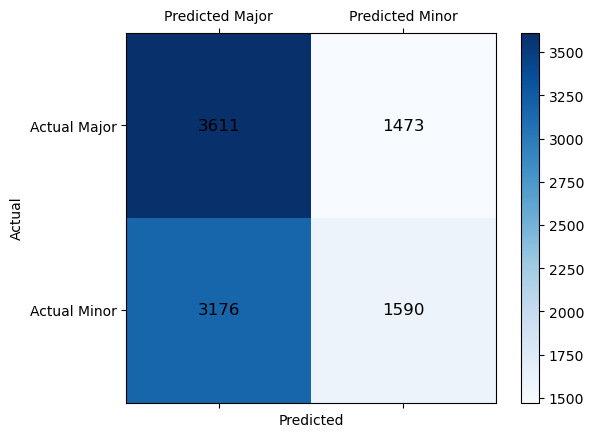

In [8]:
df_test = df.iloc[split_index:]

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for index, row in df_test.iterrows():
    
    X_sample = row[dtc_attr].values.reshape(1,-1)
    predicted_mode = dtc.predict(X_sample)[0]

    actual_mode = row['mode']
    if actual_mode == 1 and predicted_mode == 1:
        true_positive += 1
    elif actual_mode == 0 and predicted_mode == 0:
        true_negative += 1
    elif actual_mode == 1 and predicted_mode == 0:
        false_negative += 1
    elif actual_mode == 0 and predicted_mode == 1:
        false_positive += 1

# Create and print confusion matrix
conf_matrix = pd.DataFrame([[true_positive, false_negative], [false_positive, true_negative]],
                            index=['Actual Major', 'Actual Minor'],
                            columns=['Predicted Major', 'Predicted Minor'])
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap='Blues')
plt.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], conf_matrix.columns)
plt.yticks([0, 1], conf_matrix.index)
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix.iloc[i, j]), ha='center', va='center', color='black', fontsize=12)
plt.show()

In [9]:
rf_attr = ['danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence']
X_rf_attr = df_train[rf_attr]
y_rf_attr = df_train['mode'].ravel()

feature_names_list = X_rf_attr.columns.tolist()

# Create and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, random_state=42)
rf.fit(X_rf_attr, y_rf_attr)

# Assuming you have a testing set df_test
df_test = df.iloc[split_index:]

X_test = df_test[rf_attr]
y_test = df_test['mode'].ravel()

# Use the trained Random Forest model to predict on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100}")

Random Forest Accuracy: 58.680203045685275


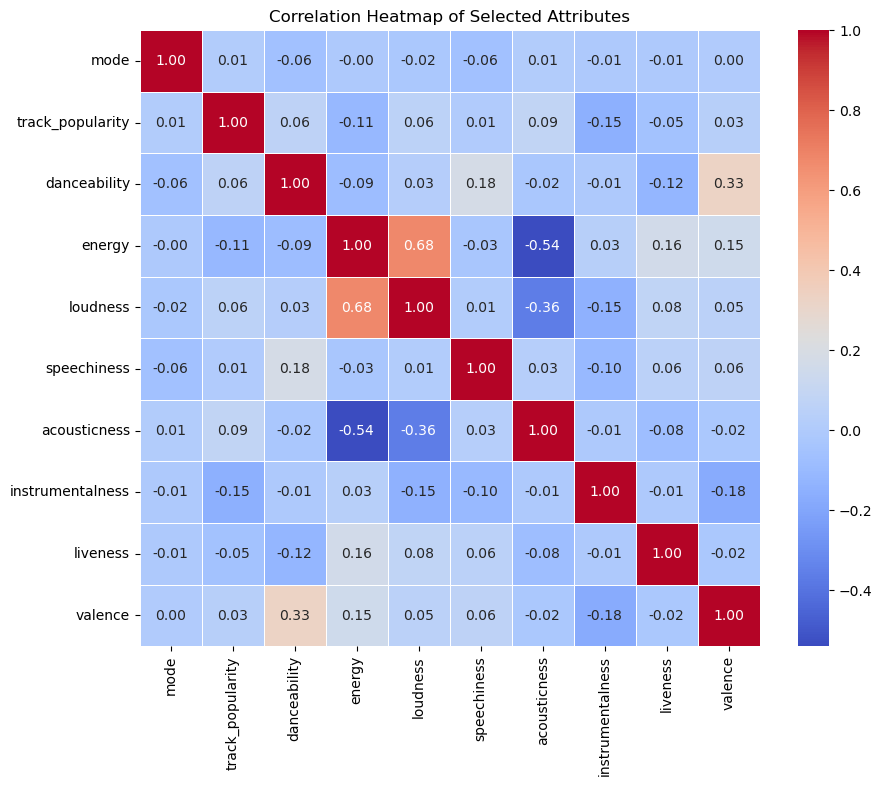

In [10]:
# Select the attributes
attributes = ['mode', 'track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Subset the DataFrame with selected attributes and drop rows with missing values
selected_df = df[attributes].dropna()

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Selected Attributes')
plt.show()

In [12]:
# List of attributes to remove
attributes_to_remove = ['playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']

# Remove specified columns
df_reduced = df.drop(columns=attributes_to_remove)

# Remove duplicate rows
df_no_duplicates = df_reduced.drop_duplicates()

# Select a sample track for recommendation (replace 'Sample Track Name' with the actual track name)
sample_track_name = 'The Climb'
sample_track = df_no_duplicates[df_no_duplicates['track_name'] == sample_track_name].loc[:, selected_attributes]

# Select all other tracks for comparison
comparison_tracks = df_no_duplicates[df_no_duplicates['track_name'] != sample_track_name].loc[:, selected_attributes]

# Calculate cosine similarity
similarities = cosine_similarity(sample_track, comparison_tracks)

# Create a DataFrame with track names and their similarity scores
similar_tracks_df = pd.DataFrame({
    'track_name': df_no_duplicates[df_no_duplicates['track_name'] != sample_track_name]['track_name'],
    'similarity_score': similarities[0]
})

# Sort the DataFrame by similarity score in descending order
similar_tracks_df = similar_tracks_df.sort_values(by='similarity_score', ascending=False)

# Display the top N similar tracks (adjust N as needed)
top_n_similar_tracks = similar_tracks_df.head(5)
print(f"Top {5} tracks similar to '{sample_track_name}':")
print(top_n_similar_tracks[['track_name', 'similarity_score']])

Top 5 tracks similar to 'The Climb':
                track_name  similarity_score
17537              Mientes          0.999974
11693  A Life Within a Day          0.999929
16074     Wheel in the Sky          0.999929
14321                Shout          0.999923
17547             Te amaré          0.999921
